In [1]:
import os
from PIL import Image

In [2]:
def get_train_file_path(foldername):
    return f"train/{foldername}"

In [3]:
def validate_file(folder_path):
    image_count=0;
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        if os.path.isfile(item_path):
            image_count=image_count+1
    print(f"{folder_path}")        
    print(f"{image_count}")     

In [4]:
validate_file(get_train_file_path("angry"))
validate_file(get_train_file_path("bored"))
validate_file(get_train_file_path("focused"))
validate_file(get_train_file_path("neutral"))

train/angry
812
train/bored
649
train/focused
759
train/neutral
800


In [5]:
def check_imagesize(folder_path):
    valid=True
    print(f"{folder_path}")
    for filename in os.listdir(folder_path):
        file_path=os.path.join(folder_path,filename)
        if os.path.isfile(file_path):
            size_in_byte=os.path.getsize(file_path)
            if size_in_byte>2500:
                print("Invalid size")
                valid=False
                break        
    return valid

In [6]:
check_imagesize(get_train_file_path("angry"))
check_imagesize(get_train_file_path("bored"))
check_imagesize(get_train_file_path("focused"))
check_imagesize(get_train_file_path("neutral"))

train/angry
train/bored
train/focused
Invalid size
train/neutral


True

In [7]:
def get_test_file_path(folder_path):
    return f"test/{folder_path}"

In [8]:
validate_file(get_test_file_path("angry"))
validate_file(get_test_file_path("bored"))
validate_file(get_test_file_path("focused"))
validate_file(get_test_file_path("neutral"))

test/angry
260
test/bored
138
test/focused
381
test/neutral
300


In [9]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def visualize_sample_images_and_pixel_intensity(folder_path, num_samples=5):
    # Get a list of image file paths in the folder
    image_files = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.lower().endswith(('.jpg'))]
    
    # Randomly sample 'num_samples' images from the folder
    sample_images = random.sample(image_files, min(num_samples, len(image_files)))
    
    # Plot the images and their pixel intensity distributions
    fig, axes = plt.subplots(num_samples, 2, figsize=(12, 4 * num_samples))
    
    for i, image_path in enumerate(sample_images):
        # Display the image
        img = Image.open(image_path)
        axes[i, 0].imshow(img)
        axes[i, 0].set_title(f"Sample Image {i + 1}")
        axes[i, 0].axis('off')
        
        # Display the pixel intensity histogram
        pixel_values = np.array(img.convert('L')).ravel()  # Convert to grayscale and flatten using NumPy
        axes[i, 1].hist(pixel_values, bins=256, range=(0, 256), density=True, color='blue', alpha=0.7)
        axes[i, 1].set_title("Pixel Intensity Histogram")
    
    plt.tight_layout()
    plt.show()


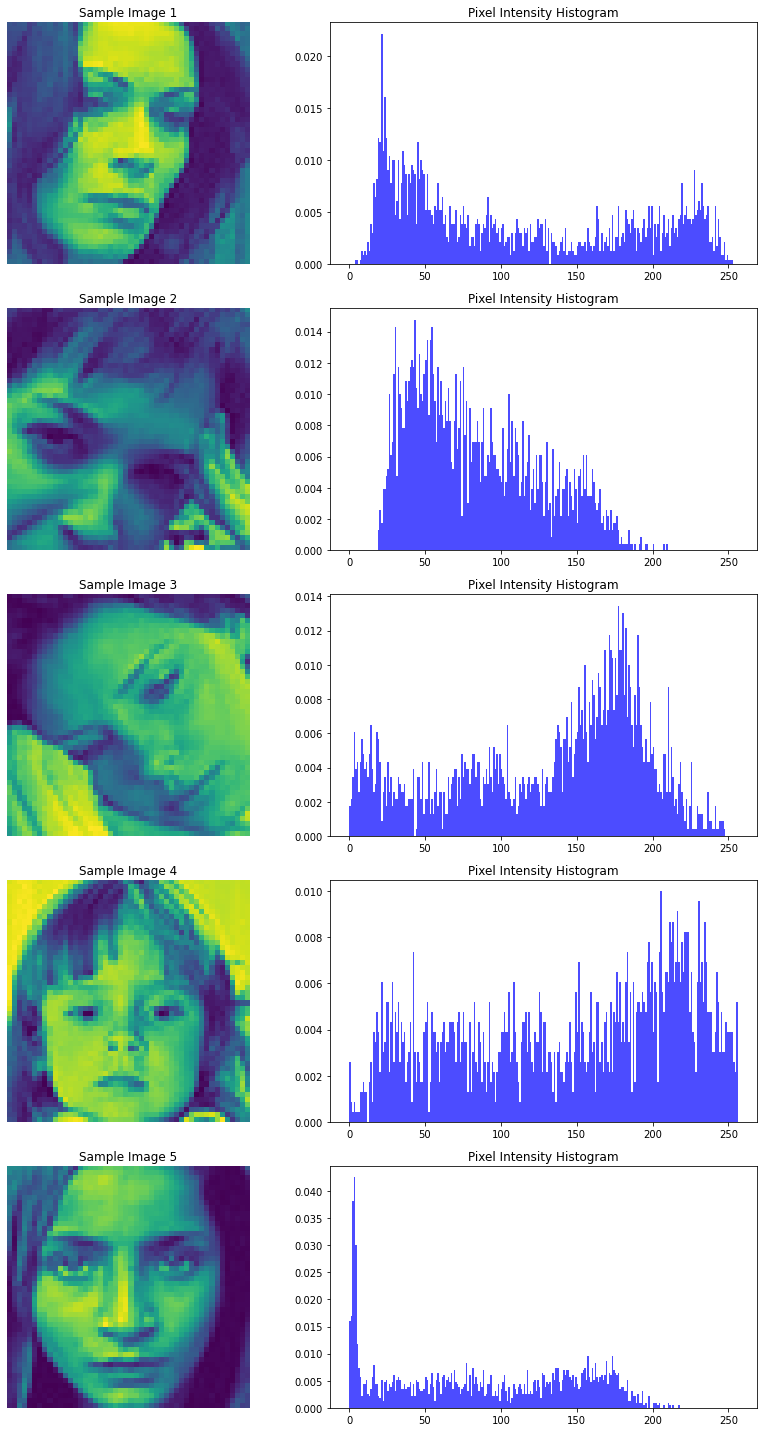

In [157]:
visualize_sample_images_and_pixel_intensity("train/bored")

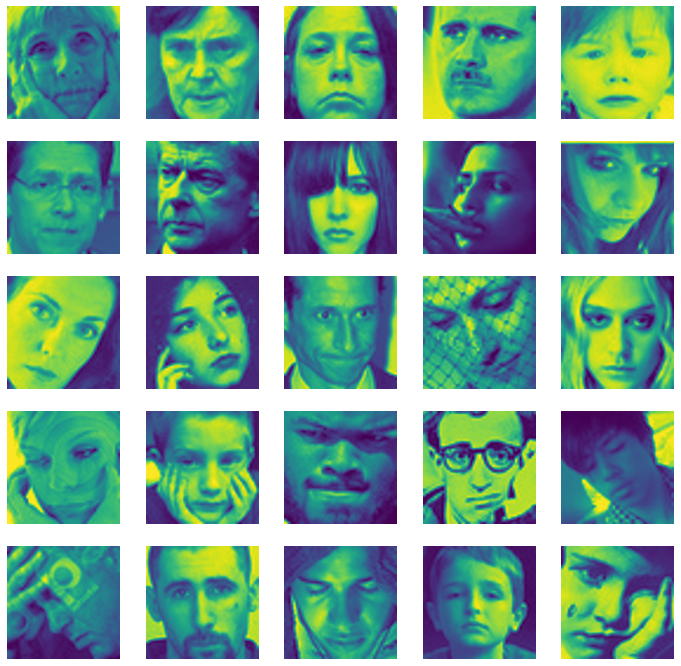

In [10]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def display_random_images_from_class_folder(class_folder, num_images=25, image_size=(128, 128)):
 
    
    # List all image files in the class folder
    image_files = [f for f in os.listdir(class_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Check if there are enough images to sample
    if num_images > len(image_files):
        num_images = len(image_files)

    # Randomly select the specified number of images
    selected_images = random.sample(image_files, num_images)

    num_rows, num_cols = 5, 5
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

    for i, ax in enumerate(axes.ravel()):
        if i < num_images:
            image_file = selected_images[i]
            image_path = os.path.join(class_folder, image_file)
            img = Image.open(image_path)
            
            # Resize the image to the desired size
            img = img.resize(image_size)
            
            ax.imshow(img)
            ax.axis('off')

    plt.show()

# Example usage:
class_folder = "path_to_class_folder"
display_random_images_from_class_folder("train/bored", 25, (128, 128))


In [11]:
import os
import matplotlib.pyplot as plt

def visualize_class_distribution(data_folder):
    # Get a list of subdirectories (class categories) in the data folder
    class_labels = [label for label in os.listdir(data_folder) if os.path.isdir(os.path.join(data_folder, label))]
    
    # Count the number of data points in each class
    class_counts = [len(os.listdir(os.path.join(data_folder, label)) ) for label in class_labels]
    
    # Create a bar chart to visualize the class distribution
    plt.figure(figsize=(6, 4))
    plt.bar(class_labels, class_counts, color=['blue', 'red','black','green','yellow'])  # You can customize colors
    plt.xlabel("Classes")
    plt.ylabel("Number of Data Points")
    plt.title("Class Distribution")
    plt.show()


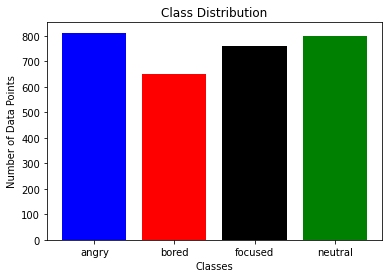

In [12]:
visualize_class_distribution("train")

In [2]:
#####################Part2######################

In [7]:
from sklearn.model_selection import train_test_split

def get_datasets(dataset):
    # Split the dataset into training, test, and validation sets
    train_data, test_val_data = train_test_split(dataset, test_size=0.30, random_state=42)
    val_data,test_data = train_test_split(test_val_data, test_size=0.15, random_state=42)

    return train_data, test_data, val_data


In [8]:
import os
from sklearn.model_selection import train_test_split

angry_train_folder = 'train/angry'
bored_train_folder="train/bored"
angry_file = os.listdir(angry_train_folder)
bored_file=os.listdir(bored_train_folder)
focused_train_folder = 'train/focused'
neutral_train_folder = 'train/neutral'
focused_file = os.listdir(focused_train_folder)
neutral_file = os.listdir(neutral_train_folder)
angry_train_data, angry_test_data, angry_val_data = get_datasets(angry_file)
bored_train_data, bored_test_data, bored_val_data = get_datasets(bored_file)
focused_train_data, focused_test_data, focused_val_data = get_datasets(focused_file)
neutral_train_data, neutral_test_data, neutral_val_data = get_datasets(neutral_file)

In [9]:
from PIL import Image
import os
import cv2
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

def get_image_label_pairs(folder_path, label, transform=None):
    image_label_pairs = []
    files = os.listdir(folder_path)
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):  # Filter by image extensions
            image_path = os.path.join(folder_path, file)
            try:
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    # Resize the image to match the expected input size (e.g., 32x32)
                    image = cv2.resize(image, (32, 32))

                    # Convert to float and normalize
                    image = image.astype(np.float32) / 255.0

                    # Ensure the shape includes the channel dimension for PyTorch
                    # Reshape the image to have a single channel (grayscale)
                    image = image.reshape(1, 32, 32)

                    # Convert the NumPy array to a PyTorch tensor
                    image = torch.from_numpy(image)

                    # Apply the specified transformations
                    if transform:
                        image = transform(image)

                    image_label_pairs.append((image, label))
                else:
                    print(f"Skipping {file} due to inability to read the image.")
            except Exception as e:
                print(f"Skipping {file} due to error: {e}")
    return image_label_pairs
data_transform = transforms.Compose([
    transforms.ToPILImage(),  # Convert NumPy array to PIL Image
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally for data augmentation
    transforms.ToTensor(),  # Convert PIL Image to PyTorch Tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the pixel values to the range [-1, 1]
])
angry_train_folder = 'train/angry'
bored_train_folder = 'train/bored'
focused_train_folder = 'train/focused'
neutral_train_folder = 'train/neutral'

angry_data = get_image_label_pairs(angry_train_folder, 0, transform=data_transform)
bored_data = get_image_label_pairs(bored_train_folder, 1, transform=data_transform)
focused_data = get_image_label_pairs(focused_train_folder, 2, transform=data_transform)
neutral_data = get_image_label_pairs(neutral_train_folder, 3, transform=data_transform)


angry_train, angry_test, angry_val = get_datasets(angry_data)
bored_train, bored_test, bored_val = get_datasets(bored_data)
focused_train, focused_test, focused_val = get_datasets(focused_data)
neutral_train, neutral_test, neutral_val = get_datasets(neutral_data)

# Combine the splits for each emotion category
combined_training_data = angry_train  + bored_train+ neutral_data+focused_data
combined_test_data = angry_test  + bored_test+neutral_test+focused_test
combined_val_data = angry_val + bored_val+neutral_val+focused_val

batch_size = 32  # Set your desired batch size
custom_training_loader =DataLoader(combined_training_data, batch_size=batch_size, shuffle=True)
custom_testing_loader=DataLoader(combined_test_data, batch_size=batch_size, shuffle=True)
custom_validation_loader=DataLoader(combined_val_data,batch_size=batch_size,shuffle=True)
# Reshape the data to have a single channel (assuming data is grayscale)
print(len(bored_val))

165


In [10]:
from collections import defaultdict

# Combined datasets (training, testing, validation)
datasets = [combined_training_data, combined_test_data, combined_val_data]
dataset_names = ['Training', 'Testing', 'Validation']

for dataset, name in zip(datasets, dataset_names):
    label_count = defaultdict(int)
    for _, label in dataset:
        label_count[label] += 1

    print(f"{name} Dataset:")
    for label, count in label_count.items():
        print(f"Label {label}: {count} samples")


Training Dataset:
Label 0: 568 samples
Label 1: 454 samples
Label 3: 800 samples
Label 2: 758 samples
Testing Dataset:
Label 0: 37 samples
Label 1: 30 samples
Label 3: 36 samples
Label 2: 35 samples
Validation Dataset:
Label 0: 207 samples
Label 1: 165 samples
Label 3: 204 samples
Label 2: 193 samples


In [11]:
# Assuming custom_training_loader is an instance of DataLoader

for batch in custom_training_loader:
    data, labels = batch  # Assuming it's structured as (data, labels)
    print("Shape of the first batch of data:", data.shape)
    print("Shape of the first batch of labels:", labels.shape)
    print(label)
    # If labels are present
    break  # To inspect just the first batc

Shape of the first batch of data: torch.Size([32, 1, 32, 32])
Shape of the first batch of labels: torch.Size([32])
2


In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img, label = self.data[idx]
        return img, label
custom_training_set = CustomDataset(combined_training_data)
custom_testing_set = CustomDataset(combined_test_data)
custom_validation_set = CustomDataset(combined_val_data)

custom_training_loader = DataLoader(custom_training_set, batch_size=batch_size, shuffle=True)
custom_testing_loader = DataLoader(custom_testing_set, batch_size=batch_size, shuffle=True)
custom_validation_loader = DataLoader(custom_validation_set, batch_size=batch_size, shuffle=True)
    

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,  classification_report
def get_confusion_matrix(model):
    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for images, labels in custom_testing_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.numpy())
            all_predictions.extend(predicted.numpy())

    # Generate confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)

    # Display or print the confusion matrix
    # print("Confusion Matrix:")
   
    class_labels = ['angry', 'bored', 'focused', 'neutral']
    print("Confusion Matrix:")
    print("\t\t" + "\t".join(class_labels))
    for i, row in enumerate(cm):
        print(f"{class_labels[i]}\t" + "\t\t".join(map(str, row)))

    
    if class_labels:
        print("\nClassification Report:")
        print(classification_report(all_labels, all_predictions, target_names=class_labels))


In [14]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model.to(device)
    model.eval()

    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in custom_validation_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # Convert lists to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return accuracy, precision, recall, f1


In [15]:
class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 4)  # Assuming 4 emotion categories
        self.dropout = nn.Dropout(0.5)  # Adding dropout layer

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        x = nn.functional.relu(self.conv3(x))
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 128 * 4 * 4)  # Flattening before fully connected layers
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout before the final layer
        x = self.fc2(x)
        return x


In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 6 * 6, 128)  # Adjust 8*8 based on your image size
        self.fc2 = nn.Linear(128, 4)  # 4 classes: angry, bored, focused, neutral

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 6 * 6)  # Adjust 8*8 based on your image size
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x



In [65]:
class SuperSimpleCNN(nn.Module):
    def __init__(self):
        super(SuperSimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=7, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=7, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Added BatchNorm2d and LeakyReLU to conv1 and conv2
        self.batch_norm1 = nn.BatchNorm2d(16)
        self.leaky_relu1 = nn.LeakyReLU(inplace=True)
        
        self.batch_norm2 = nn.BatchNorm2d(32)
        self.leaky_relu2 = nn.LeakyReLU(inplace=True)

        self.fc1 = nn.Linear(32 * 5 * 5, 4)  # Adjusted input size based on the output of the last convolutional layer
        
                

    def forward(self, x):
        x = self.leaky_relu1(self.batch_norm1(self.conv1(x)))
        x = self.pool(x)  # Apply max pooling after the first convolutional layer

        x = self.leaky_relu2(self.batch_norm2(self.conv2(x)))
        x = self.pool(x)  # Apply max pooling after the second convolutional layer
      
        x = x.view(-1, 32 * 5 * 5)  # Adjusted input size for the fully connected layers
        x = self.fc1(x)
        return x


In [18]:
import torch
import numpy as np
import random

seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed) if torch.cuda.is_available() else None
np.random.seed(seed)
random.seed(seed)


In [75]:
# import torch.optim as optim
# def train_model(Model,num_epochs):
    
#     model = Model

#     # Inside your training loop
#     class_weights = torch.tensor([0.5, 0.5, 1.0, 0.8])
#     criterion = nn.CrossEntropyLoss(weight=class_weights)
#     optimizer = optim.Adam(model.parameters(), lr=0.0001)
#      # Learning rate scheduler

#     # Training loop

#     # Assuming you have combined_train_loader and validation_loader DataLoader objects

#     num_epochs = num_epochs

#     for epoch in range(num_epochs):
#         model.train()
#         running_loss = 0.0

#         for i, (images, labels) in enumerate(custom_training_loader):
#             optimizer.zero_grad()
#             outputs = model(images)  # Define criterion here with weighted classes
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
#             running_loss += loss.item()

#             if (i + 1) % 100 == 0:  # Print every 100 mini-batches
#                 print(f"Epoch [{epoch + 1}, {i + 1}] Loss: {running_loss / 100:.3f}")
#                 running_loss = 0.0

#         # Validation after each epoch
#         model.eval()  # Set the model to evaluation mode
#         val_running_loss = 0.0
#         correct = 0
#         total = 0

#         with torch.no_grad():
#             for images, labels in custom_validation_loader:
#                 outputs = model(images)
#                 val_loss = criterion(outputs, labels)
#                 val_running_loss += val_loss.item()
#                 _, predicted = torch.max(outputs.data, 1)
#                 total += labels.size(0)
#                 correct += (predicted == labels).sum().item()

#         print(f"Epoch [{epoch + 1}] Validation Loss: {val_running_loss / len(custom_validation_loader):.3f}")
#         print(f"Epoch [{epoch + 1}] Validation Accuracy: {(100 * correct / total):.2f}%")
import torch.optim as optim
import torch.nn as nn
import torch
import numpy as np
import random




def train_model(Model, num_epochs, patience=3):
    model = Model
    
    seed = 42
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed) if torch.cuda.is_available() else None
    np.random.seed(seed)
    random.seed(seed)

    class_weights =torch.tensor([0.3, 0.3, 0.5, 0.5])
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Initialize variables for early stopping
    best_val_loss = float('inf')
    epochs_without_improvement = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for i, (images, labels) in enumerate(custom_training_loader):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            if (i + 1) % 100 == 0:
                print(f"Epoch [{epoch + 1}, {i + 1}] Loss: {running_loss / 100:.3f}")
                running_loss = 0.0

        # Validation after each epoch
        model.eval()
        val_running_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in custom_validation_loader:
                outputs = model(images)
                val_loss = criterion(outputs, labels)
                val_running_loss += val_loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        avg_val_loss = val_running_loss / len(custom_validation_loader)
        print(f"Epoch [{epoch + 1}] Validation Loss: {avg_val_loss:.3f}")
        print(f"Epoch [{epoch + 1}] Validation Accuracy: {(100 * correct / total):.2f}%")

        # Check for early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        if epochs_without_improvement >= patience:
            print(f"Early stopping after {epoch + 1} epochs without improvement.")
            break


In [50]:
SimpleCNN_model=SimpleCNN()
train_model(Model=SimpleCNN_model,num_epochs=50)


Epoch [1] Validation Loss: 1.370
Epoch [1] Validation Accuracy: 25.62%
Epoch [2] Validation Loss: 1.367
Epoch [2] Validation Accuracy: 27.18%
Epoch [3] Validation Loss: 1.304
Epoch [3] Validation Accuracy: 30.69%
Epoch [4] Validation Loss: 1.316
Epoch [4] Validation Accuracy: 29.91%
Epoch [5] Validation Loss: 1.256
Epoch [5] Validation Accuracy: 34.20%
Epoch [6] Validation Loss: 1.226
Epoch [6] Validation Accuracy: 34.46%
Epoch [7] Validation Loss: 1.210
Epoch [7] Validation Accuracy: 36.28%
Epoch [8] Validation Loss: 1.235
Epoch [8] Validation Accuracy: 38.23%
Epoch [9] Validation Loss: 1.214
Epoch [9] Validation Accuracy: 36.93%
Epoch [10] Validation Loss: 1.265
Epoch [10] Validation Accuracy: 35.89%
Early stopping after 10 epochs without improvement.


In [21]:
get_confusion_matrix(model=SimpleCNN_model)

Confusion Matrix:
		angry	bored	focused	neutral
angry	9		1		10		17
bored	2		1		9		18
focused	2		0		27		6
neutral	2		2		9		23

Classification Report:
              precision    recall  f1-score   support

       angry       0.60      0.24      0.35        37
       bored       0.25      0.03      0.06        30
     focused       0.49      0.77      0.60        35
     neutral       0.36      0.64      0.46        36

    accuracy                           0.43       138
   macro avg       0.43      0.42      0.37       138
weighted avg       0.43      0.43      0.38       138



In [22]:
evaluate_model(SimpleCNN_model)

Accuracy: 0.4356
Precision: 0.4863
Recall: 0.4356
F1 Score: 0.3910


(0.435630689206762, 0.4862852104921963, 0.435630689206762, 0.391045093628225)

In [76]:
SuperSimpleCNN_model=SuperSimpleCNN()
train_model(SuperSimpleCNN_model,num_epochs=45)

Epoch [1] Validation Loss: 1.243
Epoch [1] Validation Accuracy: 37.32%
Epoch [2] Validation Loss: 1.218
Epoch [2] Validation Accuracy: 44.21%
Epoch [3] Validation Loss: 1.112
Epoch [3] Validation Accuracy: 48.89%
Epoch [4] Validation Loss: 1.095
Epoch [4] Validation Accuracy: 47.59%
Epoch [5] Validation Loss: 1.065
Epoch [5] Validation Accuracy: 49.93%
Epoch [6] Validation Loss: 0.976
Epoch [6] Validation Accuracy: 58.52%
Epoch [7] Validation Loss: 0.950
Epoch [7] Validation Accuracy: 58.52%
Epoch [8] Validation Loss: 1.232
Epoch [8] Validation Accuracy: 54.49%
Epoch [9] Validation Loss: 0.906
Epoch [9] Validation Accuracy: 60.34%
Epoch [10] Validation Loss: 0.966
Epoch [10] Validation Accuracy: 64.63%
Epoch [11] Validation Loss: 0.837
Epoch [11] Validation Accuracy: 65.80%
Epoch [12] Validation Loss: 0.809
Epoch [12] Validation Accuracy: 68.01%
Epoch [13] Validation Loss: 0.894
Epoch [13] Validation Accuracy: 68.53%
Epoch [14] Validation Loss: 0.804
Epoch [14] Validation Accuracy: 66.

In [77]:
get_confusion_matrix(model=SuperSimpleCNN_model)

Confusion Matrix:
		angry	bored	focused	neutral
angry	11		5		5		16
bored	6		13		3		8
focused	0		0		35		0
neutral	0		0		0		36

Classification Report:
              precision    recall  f1-score   support

       angry       0.65      0.30      0.41        37
       bored       0.72      0.43      0.54        30
     focused       0.81      1.00      0.90        35
     neutral       0.60      1.00      0.75        36

    accuracy                           0.69       138
   macro avg       0.70      0.68      0.65       138
weighted avg       0.69      0.69      0.65       138



In [83]:
evaluate_model(SuperSimpleCNN_model)

Accuracy: 0.6840
Precision: 0.6803
Recall: 0.6840
F1 Score: 0.6437


(0.6840052015604682,
 0.6802705649330072,
 0.6840052015604682,
 0.6437043109436058)

In [26]:
ImprovedCNN_model=ImprovedCNN()
train_model(ImprovedCNN_model,num_epochs=58)

Epoch [1] Validation Loss: 1.364
Epoch [1] Validation Accuracy: 25.10%
Epoch [2] Validation Loss: 1.315
Epoch [2] Validation Accuracy: 27.70%
Epoch [3] Validation Loss: 1.351
Epoch [3] Validation Accuracy: 29.91%
Epoch [4] Validation Loss: 1.311
Epoch [4] Validation Accuracy: 29.78%
Epoch [5] Validation Loss: 1.271
Epoch [5] Validation Accuracy: 34.07%
Epoch [6] Validation Loss: 1.308
Epoch [6] Validation Accuracy: 34.07%
Epoch [7] Validation Loss: 1.240
Epoch [7] Validation Accuracy: 33.55%
Epoch [8] Validation Loss: 1.248
Epoch [8] Validation Accuracy: 36.67%
Epoch [9] Validation Loss: 1.227
Epoch [9] Validation Accuracy: 37.97%
Epoch [10] Validation Loss: 1.281
Epoch [10] Validation Accuracy: 35.89%
Epoch [11] Validation Loss: 1.218
Epoch [11] Validation Accuracy: 36.80%
Epoch [12] Validation Loss: 1.193
Epoch [12] Validation Accuracy: 38.75%
Epoch [13] Validation Loss: 1.254
Epoch [13] Validation Accuracy: 37.97%
Epoch [14] Validation Loss: 1.242
Epoch [14] Validation Accuracy: 39.

In [27]:
get_confusion_matrix(model=ImprovedCNN_model)

Confusion Matrix:
		angry	bored	focused	neutral
angry	5		0		11		21
bored	2		0		9		19
focused	2		0		29		4
neutral	1		0		8		27

Classification Report:
              precision    recall  f1-score   support

       angry       0.50      0.14      0.21        37
       bored       0.00      0.00      0.00        30
     focused       0.51      0.83      0.63        35
     neutral       0.38      0.75      0.50        36

    accuracy                           0.44       138
   macro avg       0.35      0.43      0.34       138
weighted avg       0.36      0.44      0.35       138



C:\Users\sepeh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sepeh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sepeh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [28]:
evaluate_model(ImprovedCNN_model)

Accuracy: 0.3966
Precision: 0.3593
Recall: 0.3966
F1 Score: 0.3214


C:\Users\sepeh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.3966189856957087, 0.3592754478725169, 0.3966189856957087, 0.321355746157336)

In [2]:
def load_model_and_predict(model_name, image_path):
    model=model_name()
    # Add more elif statements for other models as needed

    model.load_state_dict(torch.load(f"{model_name}_model.pth"))
    model.eval()

    transformation = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  
    transforms.ToPILImage(),  # Convert NumPy array to PIL Image
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally for data augmentation
    transforms.ToTensor(),  # Convert PIL Image to PyTorch Tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the pixel values to the range [-1, 1]
])

    image = Image.open(image_path).convert("L")  # Convert to grayscale
    image = transformation(image)

    with torch.no_grad():
        predictions = model(image)

    # Print or use predictions as needed
    print(predictions.numpy())

In [95]:
from Untitled.ipynb import 

TypeError: save() missing 1 required positional argument: 'f'

In [98]:
# current_directory = os.getcwd()
# file_name = 'Best_model.pth'

# # Create the full path
# file_path = os.path.join(current_directory, file_name)
# torch.save(SuperSimpleCNN_model.state_dict(),file_path)

In [99]:
pretrained = all(key.startswith('features') or key.startswith('classifier') for key in SuperSimpleCNN_model.state_dict().keys())

if pretrained:
    print("The model is pretrained.")
else:
    print("The model is not pretrained.")

The model is not pretrained.
